In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
#Reading CSV file
VG= pd.read_csv('List of best-selling video games.csv')

VG.head(6)

,Rank,Title,Sales,Series,Platform(s),Initial release date,Developer(s)[a],Publisher(s)[a]
0,1,Minecraft,"238,000,000[b]",Minecraft,Multi-platform[c],"November 18, 2011[d]",Mojang Studios,Xbox Game Studios
1,2,Grand Theft Auto V,"170,000,000",Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
2,3,Tetris (EA),"100,000,000",Tetris,Multi-platform[e],"September 12, 2006",EA Mobile,Electronic Arts
3,4,Wii Sports,"82,900,000",Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
4,5,PUBG: Battlegrounds,"75,000,000",PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,PUBG Corporation
5,6,Super Mario Bros.,"58,000,000",Super Mario,Multi-platform[f],"September 13, 1985",Nintendo R&D4,Nintendo


In [3]:
### FILTERING ###

In [4]:
#Removes NULL values
VG = VG.dropna()

In [5]:
#check if values are defined
VG.isnull().any().any()

False

In [6]:
#remove [b] from dataset
VG['Sales'][0]=VG.loc[0,'Sales'].split('[')[0]

In [7]:
#Changing Sales to integer data.
VG['Sales']=VG['Sales'].astype('str')
VG['Sales']= VG['Sales'].replace(',','', regex=True)
VG['Sales']=VG['Sales'].astype('int64')
VG['Sales'][0]

238000000

In [8]:
#Filter data to be complete. Remove anything uneccesary, in this case [] in the dataset
pattern = re.compile(r'\[[a-zA-Z]\]')
for i in VG.columns:
    if(i!='Rank') & (i!='Sales'):
        VG[i]= VG[i].str.replace(pattern,'', regex = True)

In [9]:
#rename columns 
VG= VG.rename({'Developer(s)[a]': 'Developer(s)', 'Publisher(s)[a]': 'Publisher(s)' , 'Initial release date' : 'ReleaseDate'}, axis=1)

In [10]:
#Filter dates to be able to have them correctly placed
#Created a new column for the years specifically
VG['ReleaseDate']=pd.to_datetime(VG['ReleaseDate'])
VG['Year_Released'] = pd.DatetimeIndex(VG['ReleaseDate']).year

In [11]:
#Check wht is found in Platform(s)
VG['Platform(s)'].unique()

array(['Multi-platform', 'Wii', 'Wii U\xa0/\xa0Switch',
       'Game Boy\xa0/\xa0Color', 'Game Boy\xa0/\xa0NES',
       'Nintendo Switch', 'Nintendo DS', 'Wii U / Switch', 'NES',
       'Nintendo 3DS', 'PlayStation 4\xa0/\xa0Windows',
       'PS3\xa0/\xa0Xbox 360'], dtype=object)

In [12]:
#Replacing similar text names, that should be the same. For example, 'Wii U\xa0/\xa0Switch' and 'Wii U / Switch'
text1=VG['Platform(s)'].unique()[2]
text2=VG['Platform(s)'].unique()[7]

In [13]:
VG['Platform(s)'] = VG['Platform(s)'].replace([text1,text2],text2)

In [14]:
top10=VG.head(10)

In [15]:
top10.dtypes

Rank                      int64
Title                    object
Sales                     int64
Series                   object
Platform(s)              object
ReleaseDate      datetime64[ns]
Developer(s)             object
Publisher(s)             object
Year_Released             int64
dtype: object

In [16]:
###### Visualisation #####

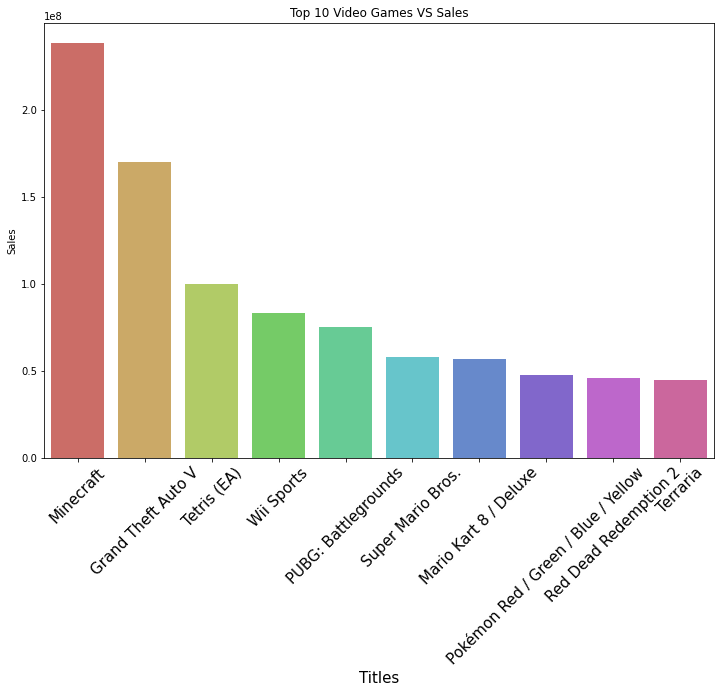

In [17]:
#Top 10 games Vs Sales
plt.figure(figsize=(12,8))
sns.barplot(x='Title', y='Sales', data=top10,color = 'blue', palette = 'hls')
plt.xlabel('Titles',size=15)
plt.xticks(rotation=45,size=15)
plt.title("Top 10 Video Games VS Sales")
plt.show()

In [18]:
#Chekcing how many Publishers are found in the top 10 games 
top10.groupby('Publisher(s)')['Publisher(s)'].unique()

Publisher(s)
Electronic Arts              [Electronic Arts]
Nintendo                            [Nintendo]
PUBG Corporation            [PUBG Corporation]
Re-Logic / 505 Games    [Re-Logic / 505 Games]
Rockstar Games                [Rockstar Games]
Xbox Game Studios          [Xbox Game Studios]
Name: Publisher(s), dtype: object

In [19]:
#Check how many Publishers we have in total 
Publishers_T=VG['Publisher(s)'].value_counts()
Publishers_T

Nintendo                          20
Rockstar Games                     5
Activision                         5
Nintendo / The Pokémon Company     2
Xbox Game Studios                  1
Electronic Arts                    1
PUBG Corporation                   1
Re-Logic / 505 Games               1
Namco                              1
CD Projekt                         1
Telltale Games                     1
2K Games                           1
EA Sports                          1
Sega                               1
Sony Interactive Entertainment     1
Name: Publisher(s), dtype: int64

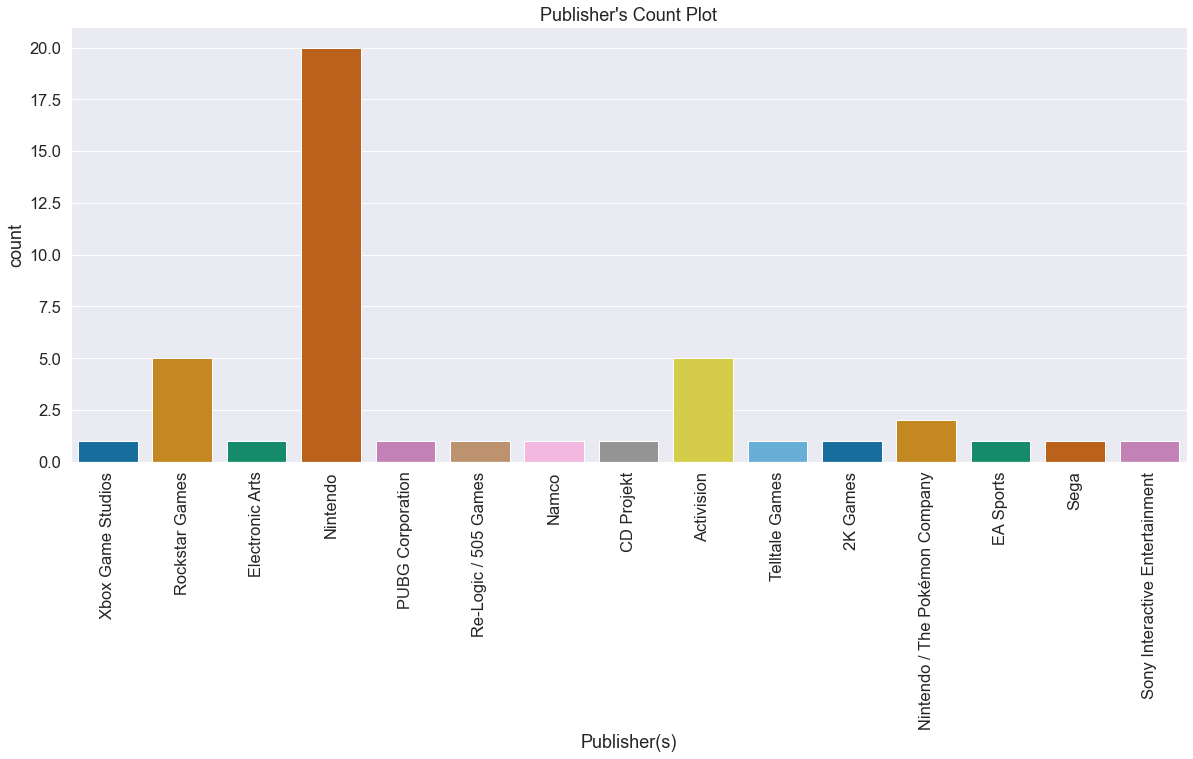

In [20]:
#Total number of times, Publishers are found in the data set
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.countplot(data=VG, x="Publisher(s)",palette="colorblind")
plt.xticks(rotation=90)
plt.title("Publisher's Count Plot")
plt.show()

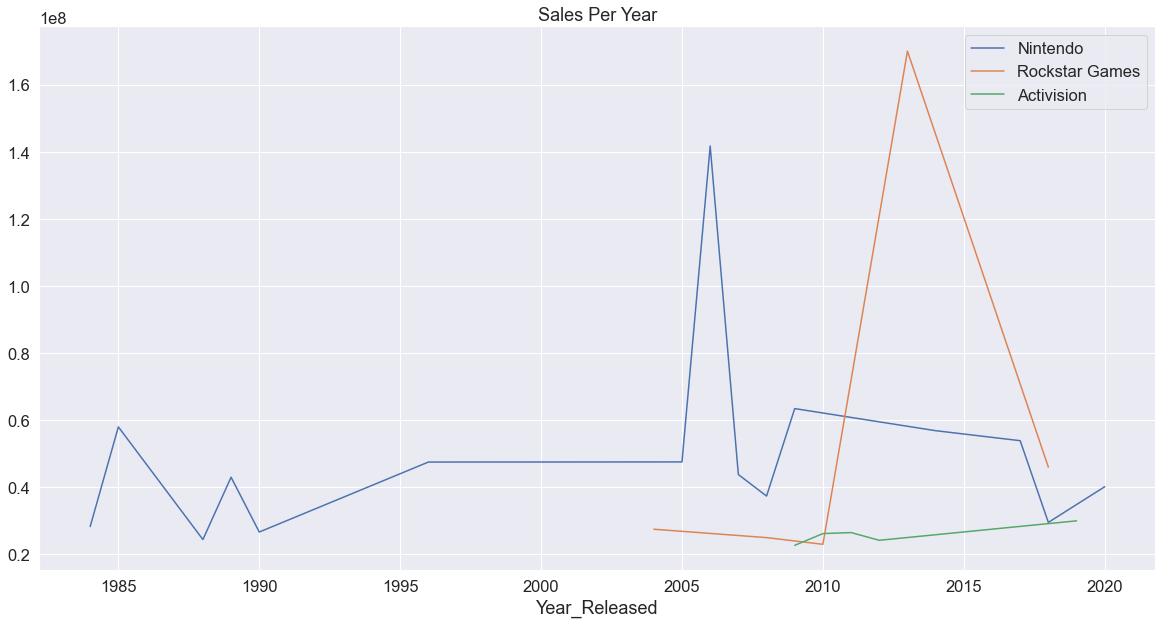

In [21]:
#Sales Per Year for the main Publishers(Nintendo, Rockstar Games and Activsion)

publ = ['Nintendo','Rockstar Games','Activision']
tmp = VG.groupby(['Publisher(s)','Year_Released']).sum()
tmp = tmp.reset_index() 
fig, ax = plt.subplots(figsize=(20,10))

for p in publ:
    indx=tmp['Publisher(s)']==p
    tmp[indx].plot(x='Year_Released',y='Sales',label=p,ax=ax,title='Sales Per Year');

Text(0.5, 1.0, "Nintendo's Best Series")

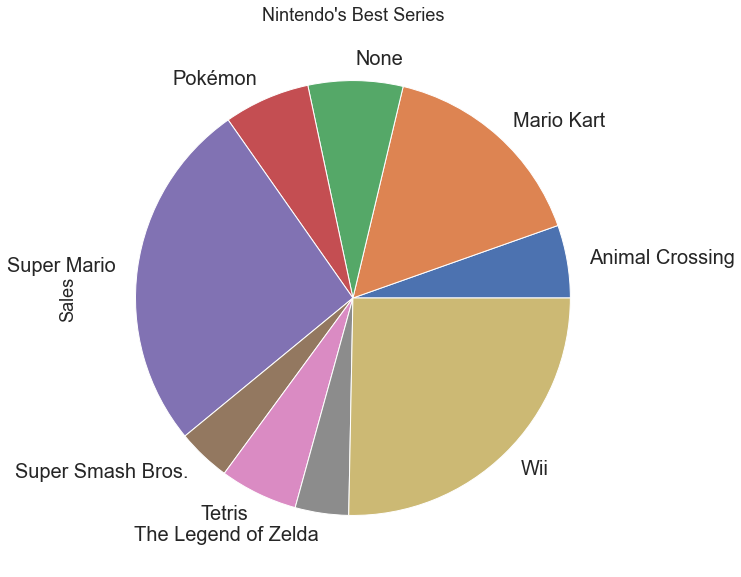

In [22]:
# Nintendos best Series
Nintendo=VG[VG['Publisher(s)']=='Nintendo']
plt.figure(figsize=(10,10))
Nintendo.groupby('Series')['Sales'].sum().plot(kind='pie',textprops={'fontsize': 20})
plt.title("Nintendo's Best Series")

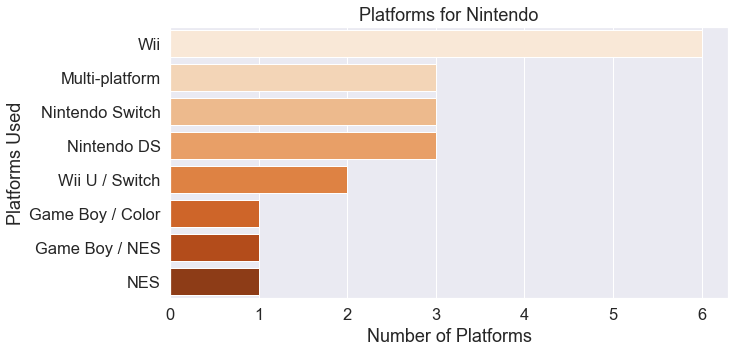

In [23]:
#Platforms For Nintendo
plt.figure(figsize=(10, 5))
sns.countplot(y=Nintendo["Platform(s)"], orient="v", 
              palette="Oranges", order=Nintendo['Platform(s)'].value_counts().index)
plt.xlabel("Number of Platforms")
plt.ylabel("Platforms Used")
plt.title("Platforms for Nintendo")
plt.show()